In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from nsepy import get_history

In [78]:
stock_data = get_history(symbol='SBIN',
                   start=date(2015,1,1),
                   end=date(2015,1,10))

In [79]:
stock_data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [45]:
%matplotlib inline


In [80]:
stock_data.Close

Date
2015-01-01    314.00
2015-01-02    315.25
2015-01-05    312.75
2015-01-06    299.90
2015-01-07    300.15
2015-01-08    304.85
2015-01-09    303.20
Name: Close, dtype: float64

In [81]:
stock_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [82]:
stock_data_close = pd.DataFrame(data.Close)

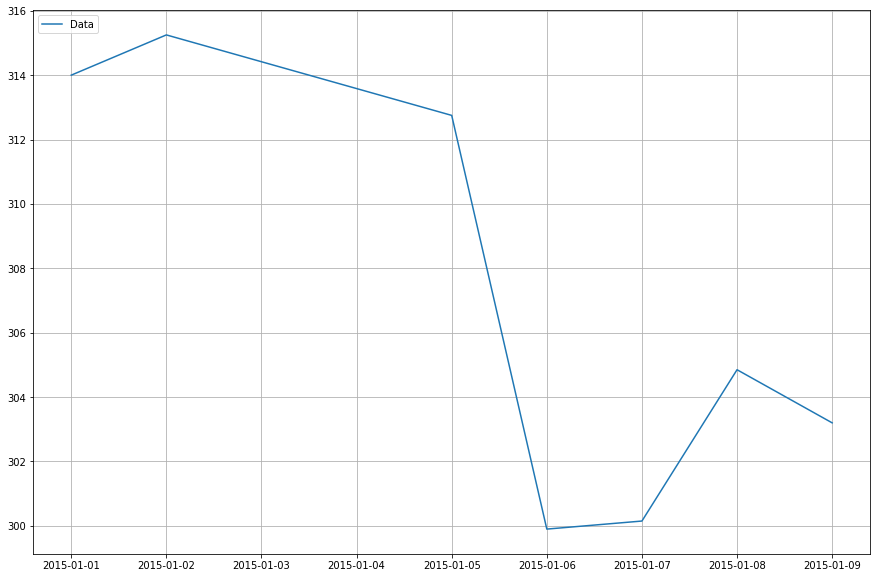

In [53]:
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(data_close['Close'], label = "Data")
plt.legend(loc=2)

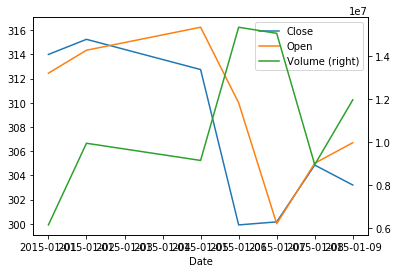

In [83]:
stock_data[['Close', 'Open', 'Volume']].plot(secondary_y="Volume")

In [84]:
fut_data = data = get_history(symbol='SBIN',
                   start=date(2015,1,1),
                   end=date(2015,1,10), futures=True, expiry_date=date(2015,1,29))

In [85]:
fut_data.head()

,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,
2015-01-01,SBIN,2015-01-29,315.10,317.95,313.40,316.65,317.00,316.65,14720,5.821172e+09,55480000,358750,314.00
2015-01-02,SBIN,2015-01-29,317.50,320.95,317.10,317.75,318.30,317.75,22525,8.988242e+09,55087500,-392500,315.25
2015-01-05,SBIN,2015-01-29,318.00,318.75,314.10,315.00,315.05,315.00,17455,6.898723e+09,55718750,631250,312.75
2015-01-06,SBIN,2015-01-29,312.95,312.95,300.10,301.30,301.10,301.30,29338,1.126715e+10,56701250,982500,299.90
2015-01-07,SBIN,2015-01-29,301.95,304.55,297.35,302.25,303.50,302.25,28489,1.074823e+10,58036250,1335000,300.15


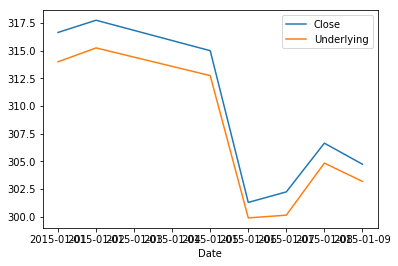

In [86]:
fut_data[['Close', 'Underlying']].plot(secondary_y="Volume")

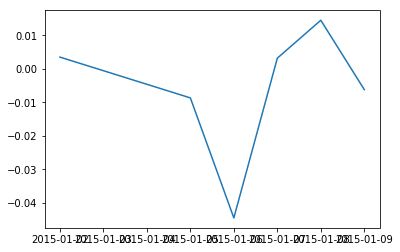

In [87]:
fut_data["change"] = np.log(fut_data["Close"] / fut_data["Close"].shift())
plt.plot(fut_data.change)

In [88]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [95]:
fut_data

,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,change
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,2015-01-29,315.10,317.95,313.40,316.65,317.00,316.65,14720,5.821172e+09,55480000,358750,314.00,NaN
2015-01-02,SBIN,2015-01-29,317.50,320.95,317.10,317.75,318.30,317.75,22525,8.988242e+09,55087500,-392500,315.25,0.003468
2015-01-05,SBIN,2015-01-29,318.00,318.75,314.10,315.00,315.05,315.00,17455,6.898723e+09,55718750,631250,312.75,-0.008692
2015-01-06,SBIN,2015-01-29,312.95,312.95,300.10,301.30,301.10,301.30,29338,1.126715e+10,56701250,982500,299.90,-0.044466
2015-01-07,SBIN,2015-01-29,301.95,304.55,297.35,302.25,303.50,302.25,28489,1.074823e+10,58036250,1335000,300.15,0.003148
2015-01-08,SBIN,2015-01-29,306.50,308.40,303.70,306.65,307.00,306.65,20120,7.702653e+09,57287500,-748750,304.85,0.014453
2015-01-09,SBIN,2015-01-29,306.75,309.25,301.05,304.75,304.15,304.75,18961,7.247211e+09,57035000,-252500,303.20,-0.006215


In [159]:
fut_data_x = pd.DataFrame(stock_data.columns)
fut_data_y = pd.DataFrame(fut_data.columns)

In [160]:
reg = linear_model.LinearRegression()

In [161]:
fut_data_x_train, fut_data_y_train, fut_data_x_test, fut_data_y_test = train_test_split(fut_data_x, fut_data_y, random_state=4)

In [162]:
fut_data_train.head()

,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,change
Date,,,,,,,,,,,,,,
2015-01-06,SBIN,2015-01-29,312.95,312.95,300.1,301.30,301.10,301.30,29338,1.126715e+10,56701250,982500,299.90,-0.044466
2015-01-01,SBIN,2015-01-29,315.10,317.95,313.4,316.65,317.00,316.65,14720,5.821172e+09,55480000,358750,314.00,NaN
2015-01-02,SBIN,2015-01-29,317.50,320.95,317.1,317.75,318.30,317.75,22525,8.988242e+09,55087500,-392500,315.25,0.003468
2015-01-08,SBIN,2015-01-29,306.50,308.40,303.7,306.65,307.00,306.65,20120,7.702653e+09,57287500,-748750,304.85,0.014453
2015-01-05,SBIN,2015-01-29,318.00,318.75,314.1,315.00,315.05,315.00,17455,6.898723e+09,55718750,631250,312.75,-0.008692


In [163]:
reg.fit(fut_data_x_train, fut_data_y_train)

ValueError: could not convert string to float: 'Turnover'